Code based on https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef.

Import relevant libraries into python

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt

Load the boston dataset, look at the dimensions of the data, and print the description of the data.

In [0]:
boston = load_boston()
print(boston.data.shape)
print(boston.DESCR)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

We are going to create a **pandas dataframe** out of the data. A dataframe is essentially a spreadsheet that can be accessed, modified, and analyzed through code.

In [0]:
bos_df = pd.DataFrame(boston.data)
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Next, set the title of each column to the feature names of the boston housing data. Then, add an additional column including the housing price data. This is stored in
```
boston.target
```
Finally, let's take a look at the first 5 rows i.e. the **head** of the data.

In [0]:
bos_df.columns = boston.feature_names
bos_df['PRICE'] = boston.target
print(bos_df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


Now we choose our independent and dependent variable for analysis. Here, we want to see what the relationship between housing prices and crime rate is. Now, let's set our independent (housing prices) and dependent (crime rate) variables equal to their proper columns.

In [0]:
var_x = 'PRICE'
var_y = 'CRIM'
X = bos_df[var_x]
Y = bos_df[var_y]

Here, we split the data up into training and testing data. This is done so that once we create a regression line using the testing data, we can check whether our line generalizes to the rest of the data. (Note, we also have some lines of the form 


```
a = a.numpy()
a = a.reshape(-1,1)
```

).
This is done for the purpose of formatting the dimensions of the data properly for use in the linear regression function later on.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,1)
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(-1,1)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(339, 1) (339, 1) (167, 1) (167, 1)


Finally, we create a new linear regression model and fit it based on our training data for the independent and dependent variable.
We now see what line of best fit the model generates for the testing data (which it has not been trained on.)

In [0]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)

Finally, plot the predicted line over the test data and see how well it fits. What sort of relationship are we seeing in the data? Does this agree with our expectations?

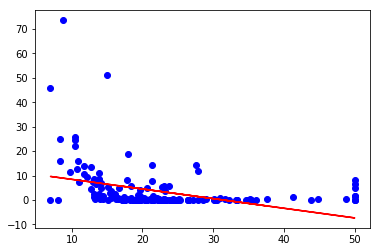

In [0]:
plt.scatter(X_test, Y_test, c='blue')
plt.plot(X_test, Y_pred, c='red')
plt.show()